# Ford GoBike Trip Data Trends between two user type - Subscriber and Customer (2018)
## by Rajat Kumar

## Investigation Overview

> In this presentation I will investigate the difference in usage of Ford GoBike rides based on User Type (Subscribers vs Customers) and further divide that based on different genders.

## Dataset Overview

> The data set used for the analysis is taken from FordGo Bike Trip Data for the year 2018. The data set consists of details of bike rides taken by users and the charecterstics associated with every trip such as start time,ride duration , month, weekday, age of user,gender of user,the user type etc.The original data set consisted of total 4598346 records and 16 columns or fields.


In [20]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [21]:
# load in the dataset into a pandas dataframe
rides=pd.read_csv('master_file_clean.csv',sep=',')

## Distribution of user_type

> There are two types of user in our data Subscriber and Customer. In the below plot we can observe that majority of users 88.5 % fall under type Subscribers and only 11.5 % fall under Customers.

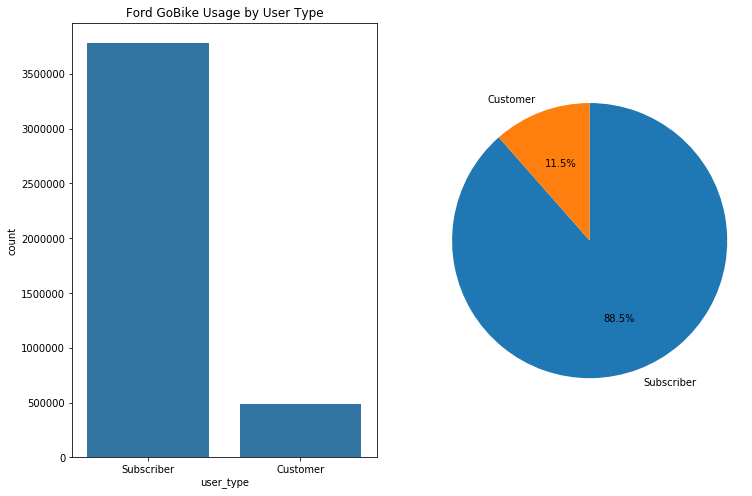

In [22]:
## User Type usage of the Ford Go bike system
plt.figure(figsize = [12, 8]) #figure size for subplots

## Bar chart for User Type usage of the Ford Go bike system
plt.subplot(1, 2, 1) # 1 row, 2 cols, subplot 1
plt.title('Ford GoBike Usage by User Type')
base_color=sb.color_palette()[0]
sb.countplot(data = rides,x='user_type',color=base_color);

#Pie chart for User Type usage of the Ford Go bike system
plt.subplot(1, 2, 2) # 1 row, 2 cols, subplot 2
sorted_counts = rides['user_type'].value_counts()
plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90,autopct='%1.1f%%',counterclock=False);
plt.axis('square');

## Distribution of user types per gender

> In Both the user types( subscribers and customers) more than 50% users are males.

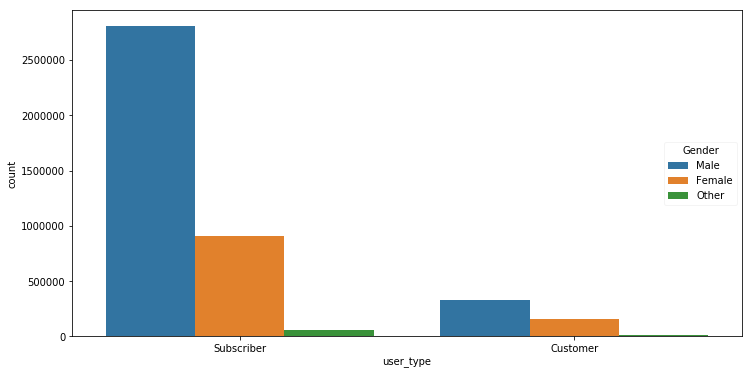

In [23]:
# countplot to observe the usertype and gender wise distribution

plt.figure(figsize=[12, 6])

ax = sb.countplot(data = rides, x = 'user_type', hue = 'member_gender')

ax.legend(loc = 7, framealpha = 0.2,title='Gender') 
plt.xticks(rotation = 0);



## Distribution of Weekly usage of the Ford GOBike Rides per user type and gender

>User Type Subscribers take more rides on working days (Monday - Friday) whereas customers take more rides on weekends (Friday-Sunday). This shows that subscribers are using the service mostly for commuting to their workplace whereas customers  are using the service for enjoying,excercise purposes.



<Figure size 864x432 with 0 Axes>

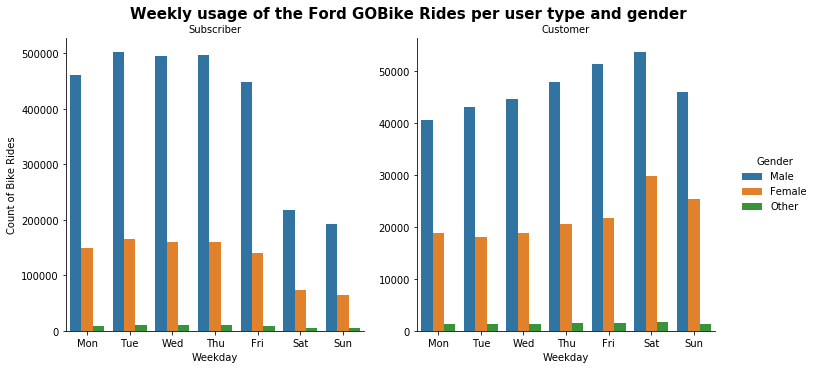

In [24]:
# bar charts to plot the Weekly usage of the Ford GOBike Rides per user type and gender
plt.figure(figsize=[12, 6])

weekday = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
g = sb.catplot(data=rides, x='start_time_weekday', col="user_type", hue='member_gender', kind='count', sharey = False,
                order = weekday)
g.set_axis_labels("Weekday", "Count of Bike Rides")
g._legend.set_title('Gender')
g.set_titles("{col_name}")
g.fig.suptitle('Weekly usage of the Ford GOBike Rides per user type and gender', y=1.02, fontsize=15, fontweight='bold');

## Distribution of Hourly usage of the Ford GOBike Rides per user type and gender

> User type subscriber take more rides during the time periods 8-9 am and 5-6 pm which shows that they use the bike service for commuting purpose. The usertype customers take more rides during time periods 11 am - 7 pm. This further solidifies our above findings that subscribers are using the service to commute whereas customers are using the service for fun purposes.



<Figure size 1440x720 with 0 Axes>

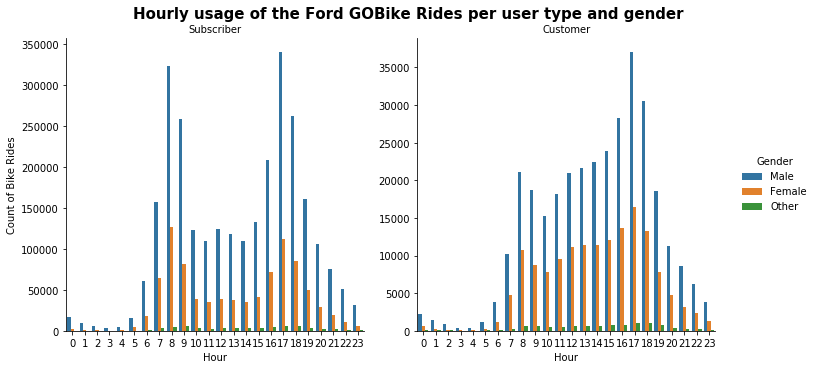

In [25]:
# bar chart to plot Hourly usage of the Ford GOBike Rides per user type and gender

plt.figure(figsize=[20, 10])

g = sb.catplot(data=rides, x='start_time_hour', col="user_type", hue='member_gender', kind='count', sharey = False)
g.set_axis_labels("Hour", "Count of Bike Rides")
g._legend.set_title('Gender')
g.set_titles("{col_name}")
g.fig.suptitle('Hourly usage of the Ford GOBike Rides per user type and gender', y=1.02, fontsize=15, fontweight='bold');